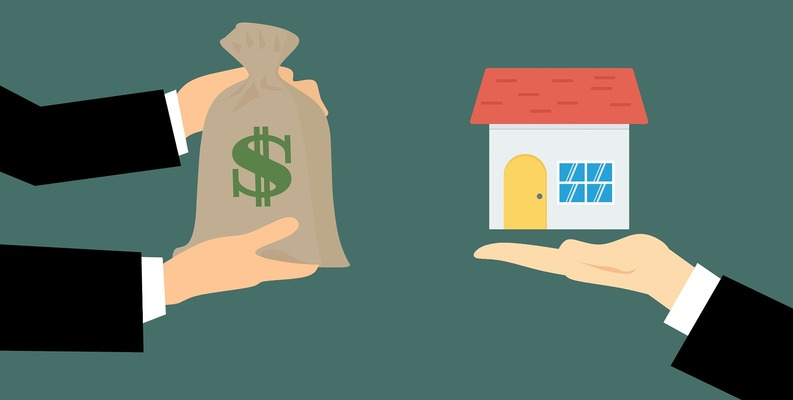
## Setup And Context

Introduction

 Imagine you're working for a real estate development company. Your company wants to value any residential project before they start. You are tasked with building a model that can provide a price estimate based on a home's characteristics like:

The number of room

The distance to employment centres

How rich or poor the area is

This dataset contains Real Estate listings in the US broken by State and zip code.


### Import Statements

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usa-real-estate-dataset/realtor-data.zip.csv


# Load The Data

In [2]:
df = pd.read_csv('/kaggle/input/usa-real-estate-dataset/realtor-data.zip.csv')

Understand the USA Real Estate Dataset



* brokered by (categorically encoded agency/broker)

* status (Housing status - a. ready for sale or b. ready to build)
* price (Housing price, it is either the current listing price or recently * sold price if the house is sold recently)
* bed (# of beds)
* bath (# of bathrooms)
* acre_lot (Property / Land size in acres)
* street (categorically encoded street address)
* city (city name)
* state (state name)
* zip_code (postal code of the area)
* house_size (house area/size/living space in square feet)
* prev_sold_date (Previously sold date)

NB:
* brokered by and street addresses were categorically encoded due to data privacy policy
* acre_lot means the total land area, and house_size denotes the living space/building area




# Preliminary Data Exploration

In [3]:
df.head(10) #shows ten rows of the dataset

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN
5,103378.0,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,612.0,2520.0,NaN
6,1205.0,for_sale,50000.0,3.0,1.0,0.20,1298094.0,Ciales,Puerto Rico,639.0,2040.0,NaN
7,50739.0,for_sale,71600.0,3.0,2.0,0.08,1048466.0,Ponce,Puerto Rico,731.0,1050.0,NaN
8,81909.0,for_sale,100000.0,2.0,1.0,0.09,734904.0,Ponce,Puerto Rico,730.0,1092.0,NaN
9,65672.0,for_sale,300000.0,5.0,3.0,7.46,1946226.0,Las Marias,Puerto Rico,670.0,5403.0,NaN


In [4]:
df.tail(10)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
2226372,108243.0,sold,425000.0,3.0,3.0,0.06,970797.0,Richland,Washington,99354.0,1876.0,2022-02-14
2226373,16235.0,sold,305000.0,4.0,2.0,0.42,353937.0,Richland,Washington,99354.0,2000.0,2022-02-11
2226374,53860.0,sold,310000.0,3.0,1.0,0.21,500240.0,Richland,Washington,99354.0,1152.0,2022-02-11
2226375,60631.0,sold,385000.0,4.0,2.0,0.21,210890.0,Richland,Washington,99354.0,1656.0,2022-03-28
2226376,85499.0,sold,339900.0,4.0,2.0,0.20,41160.0,Richland,Washington,99354.0,2780.0,2022-03-28
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24
2226381,108243.0,sold,580000.0,5.0,3.0,0.31,307704.0,Richland,Washington,99354.0,3615.0,2022-03-23


In [5]:
df.shape

(2226382, 12)

In [6]:
df.columns #data column names

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

In [7]:
  df.count() #number of data points in each column

brokered_by       2221849
status            2226382
price             2224841
bed               1745065
bath              1714611
acre_lot          1900793
street            2215516
city              2224975
state             2226374
zip_code          2226083
house_size        1657898
prev_sold_date    1492085
dtype: int64

In [8]:
df.describe().T #shows some istatistical values

,count,mean,std,min,25%,50%,75%,max
brokered_by,2221849.0,5.293989e+04,3.064275e+04,0.0,23861.00,52884.00,79183.00,1.101420e+05
price,2224841.0,5.241955e+05,2.138893e+06,0.0,165000.00,325000.00,550000.00,2.147484e+09
bed,1745065.0,3.275841e+00,1.567274e+00,1.0,3.00,3.00,4.00,4.730000e+02
bath,1714611.0,2.496440e+00,1.652573e+00,1.0,2.00,2.00,3.00,8.300000e+02
acre_lot,1900793.0,1.522303e+01,7.628238e+02,0.0,0.15,0.26,0.98,1.000000e+05
street,2215516.0,1.012325e+06,5.837635e+05,0.0,506312.75,1012765.50,1521173.25,2.001357e+06
zip_code,2226083.0,5.218668e+04,2.895408e+04,0.0,29617.00,48382.00,78070.00,9.999900e+04
house_size,1657898.0,2.714471e+03,8.081635e+05,4.0,1300.00,1760.00,2413.00,1.040400e+09


## Data Cleaning - Check for Missing Values and Duplicates

In [9]:
df.drop(columns=["brokered_by","street"], inplace=True) #we are no need to use these columns so we dropped them

In [10]:
df.columns

Index(['status', 'price', 'bed', 'bath', 'acre_lot', 'city', 'state',
       'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

In [11]:
df.info() #that functain shows us how many rows have not null variables and what is datatype have

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   status          object 
 1   price           float64
 2   bed             float64
 3   bath            float64
 4   acre_lot        float64
 5   city            object 
 6   state           object 
 7   zip_code        float64
 8   house_size      float64
 9   prev_sold_date  object 
dtypes: float64(6), object(4)
memory usage: 169.9+ MB


In [12]:
df.duplicated().sum() #shows us how many duplicated rows in the dataset

56192

In [13]:
df.drop_duplicates(inplace=True) #drop duplicated rows

In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum() #shows us how many missing values in each column

status                 0
price               1461
bed               441046
bath              471550
acre_lot          315283
city                1308
state                  8
zip_code             297
house_size        527227
prev_sold_date    684676
dtype: int64

In [16]:
col_subset = ['status', 'price',
              'bed',"bath","acre_lot","city","house_size"]
df.loc[df["price"].isna()][col_subset]
#we can observe which values are nan in price methot

,status,price,bed,bath,acre_lot,city,house_size
81793,ready_to_build,NaN,4.0,NaN,NaN,Medford,2244.0
81799,ready_to_build,NaN,3.0,NaN,NaN,Mount Laurel,2224.0
81800,ready_to_build,NaN,3.0,NaN,NaN,Mount Laurel,2270.0
82259,ready_to_build,NaN,2.0,NaN,NaN,Moorestown,1748.0
82297,ready_to_build,NaN,2.0,NaN,NaN,Moorestown,1865.0
...,...,...,...,...,...,...,...
1889961,sold,NaN,6.0,1.0,155.00,Ramona,1750.0
1890040,sold,NaN,NaN,NaN,314.68,Marion,NaN
1890076,sold,NaN,3.0,3.0,158.00,Lincolnville,2511.0
1891957,sold,NaN,NaN,NaN,333.00,Burdett,NaN


In [17]:
df[(df["status"]=="ready_to_build") & (df["price"].isna())]

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
81793,ready_to_build,NaN,4.0,NaN,NaN,Medford,New Jersey,8055.0,2244.0,NaN
81799,ready_to_build,NaN,3.0,NaN,NaN,Mount Laurel,New Jersey,8054.0,2224.0,NaN
81800,ready_to_build,NaN,3.0,NaN,NaN,Mount Laurel,New Jersey,8054.0,2270.0,NaN
82259,ready_to_build,NaN,2.0,NaN,NaN,Moorestown,New Jersey,8057.0,1748.0,NaN
82297,ready_to_build,NaN,2.0,NaN,NaN,Moorestown,New Jersey,8057.0,1865.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1350580,ready_to_build,NaN,3.0,NaN,NaN,ROSEVILLE,California,95747.0,1296.0,NaN
1350581,ready_to_build,NaN,3.0,NaN,NaN,ROSEVILLE,California,95747.0,1306.0,NaN
1392870,ready_to_build,NaN,3.0,NaN,NaN,Lynnwood,Washington,98087.0,1900.0,NaN
1394497,ready_to_build,NaN,5.0,NaN,NaN,LAKE TAPPS,Washington,98391.0,2820.0,NaN


In [18]:
#Filling null values with the mode of the column
df["bed"].fillna(df["bed"].mode()[0], inplace=True)
df["bath"].fillna(df["bath"].mode()[0], inplace=True)
df["acre_lot"].fillna(df["acre_lot"].mode()[0], inplace=True)
df["house_size"].fillna(df["house_size"].mode()[0], inplace=True)

In [19]:
df.isnull().sum() #shows us how many missing values in each column

status                 0
price               1461
bed                    0
bath                   0
acre_lot               0
city                1308
state                  8
zip_code             297
house_size             0
prev_sold_date    684676
dtype: int64

In [20]:
df.dropna(subset=["city","state","zip_code","price"], inplace=True) #drop missing values in these columns


In [21]:
df.drop("prev_sold_date",axis=1,inplace=True)

In [22]:
df.isnull().sum() #There are no null NaN values anymore Fantastic.

status        0
price         0
bed           0
bath          0
acre_lot      0
city          0
state         0
zip_code      0
house_size    0
dtype: int64

# EXPLORATORY DATA ANALYSIS

In [23]:
df[df["price"]==df["price"].max()] #shows maximum value of price column

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size
941987,for_sale,1.000000e+09,3.0,2.0,101.0,Eureka,Kansas,67045.0,1200.0


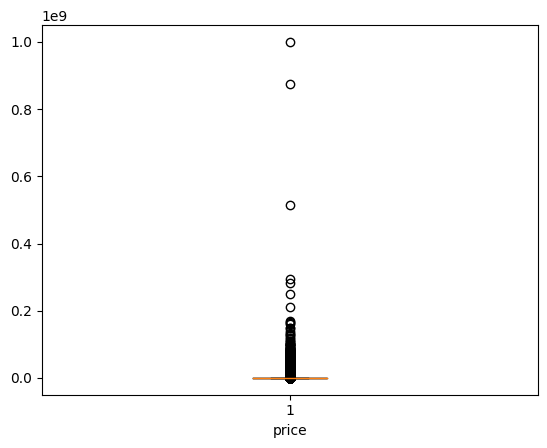

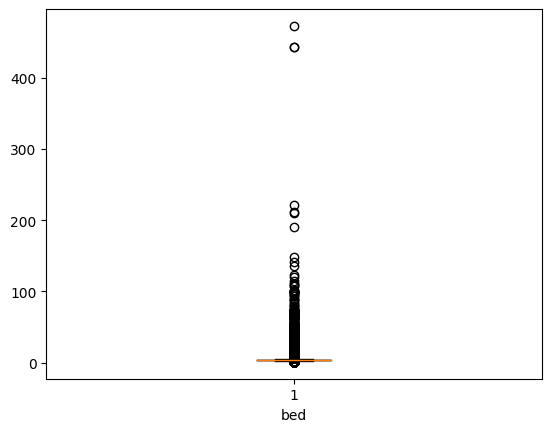

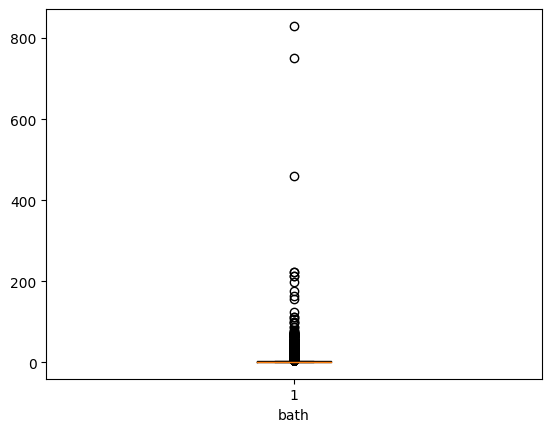

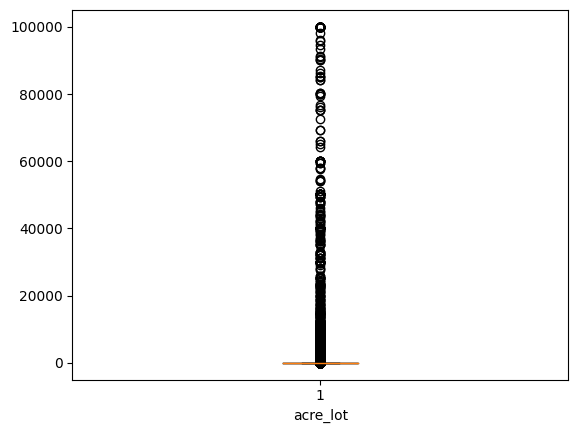

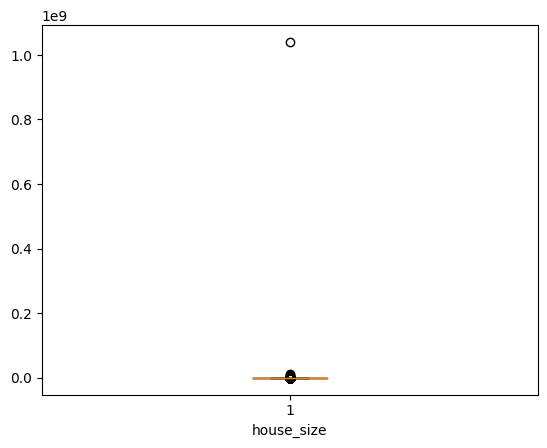

In [24]:
#we can use boxplot to observe outliers
column_names = ["price","bed","bath","acre_lot","house_size"]
for i in column_names:
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

we have too much outlier in these columns so we have to handle these

In [25]:
Q1 = df[column_names].quantile(0.25)
Q3 = df[column_names].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[column_names] < (Q1 - 1.5 * IQR)) | (df[column_names] > (Q3 + 1.5 * IQR))).any(axis=1)]
#This piece of code is used to remove outliers in a data frame.

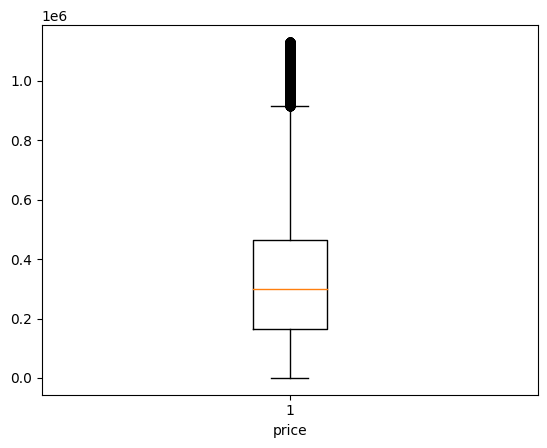

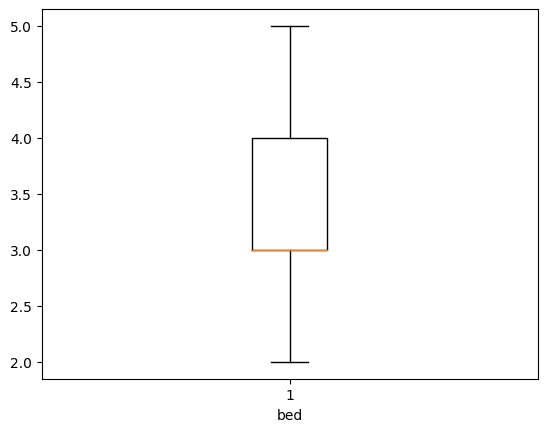

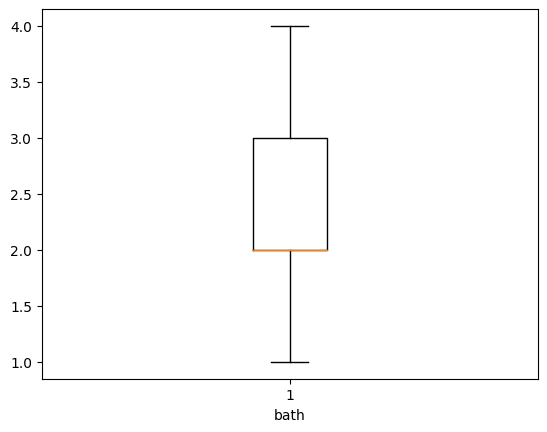

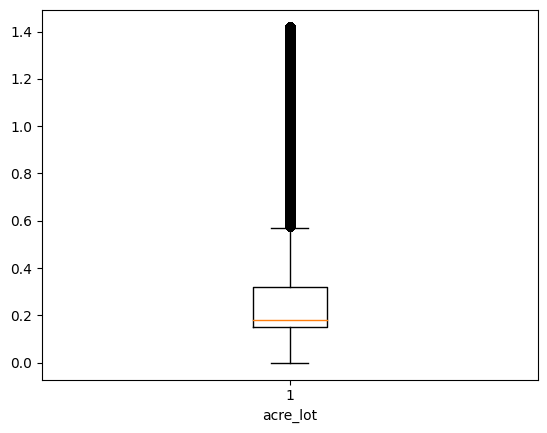

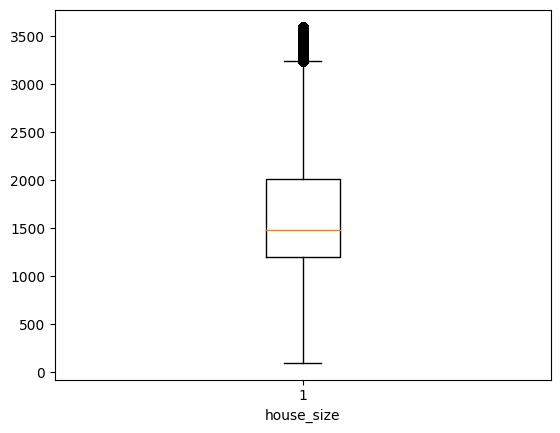

In [26]:
for i in column_names:
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

In [27]:
df_bed_dist = df["bed"].value_counts() 

In [28]:
bar_plot = px.bar(x = df_bed_dist.index, y= df_bed_dist.values, title="Distribution of Bed", hover_name=df_bed_dist.index,
                   color=df_bed_dist.values
                  ,color_continuous_scale="turbo")
bar_plot.update_layout(xaxis_title="Bed",
                      yaxis_title="Number Of Homes",coloraxis_showscale=False,
                      )
bar_plot.update_traces(text=df_bed_dist.values, textposition='outside')
bar_plot.show()


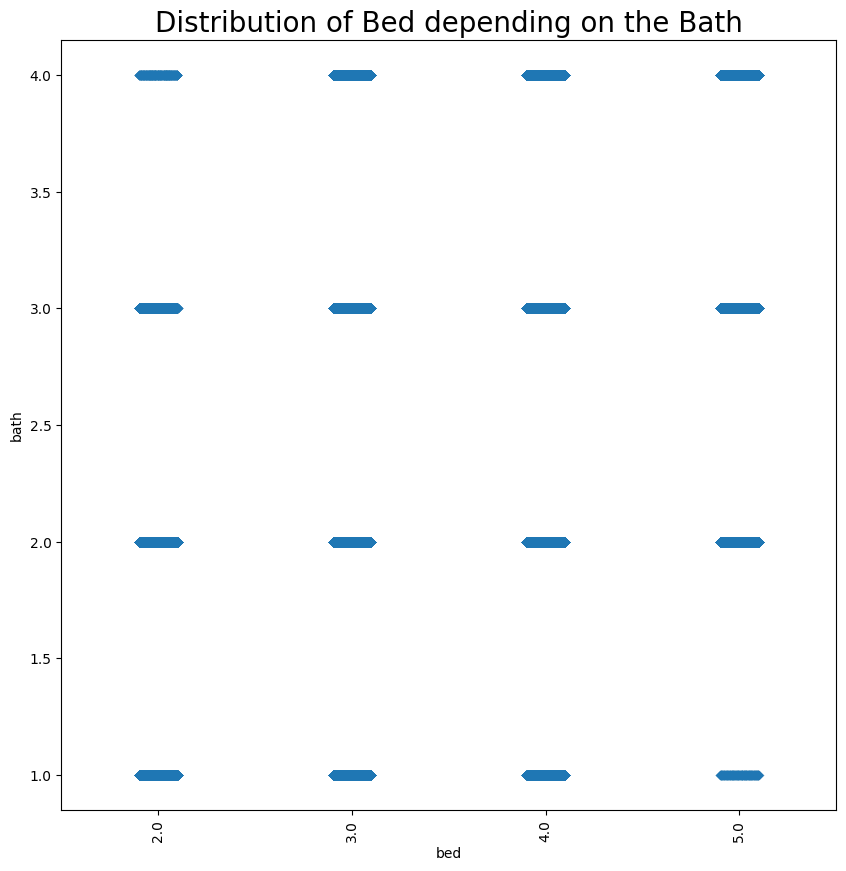

In [29]:
plt.subplots(figsize=(10,10))
plt.xticks(rotation=90)
sns.stripplot(y='bath', x='bed', data=df, marker='D', alpha=0.2)
plt.title('Distribution of Bed depending on the Bath',fontsize = 20)
plt.show()

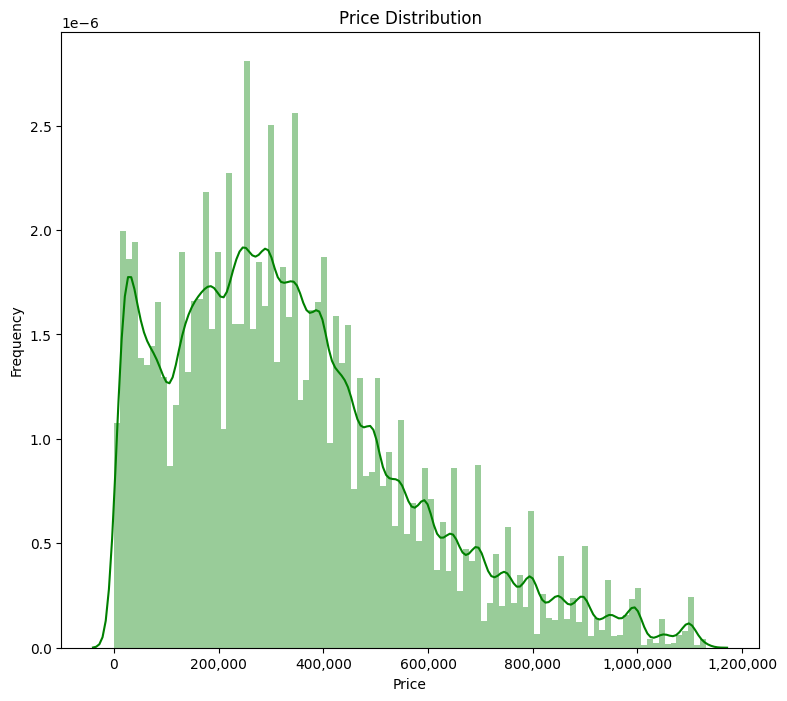

In [30]:
from matplotlib.ticker import FuncFormatter
def format_func(value, tick_number): #price values are too big so we have to format them
    return f'{value:,.0f}'
plt.figure(figsize=(9, 8))
sns.distplot(df['price'], color='g', bins=100, hist_kws={'alpha': 0.4});

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_func))

plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [31]:
df_sample = df.sample(n=1000) #we took 1000 sample in our data


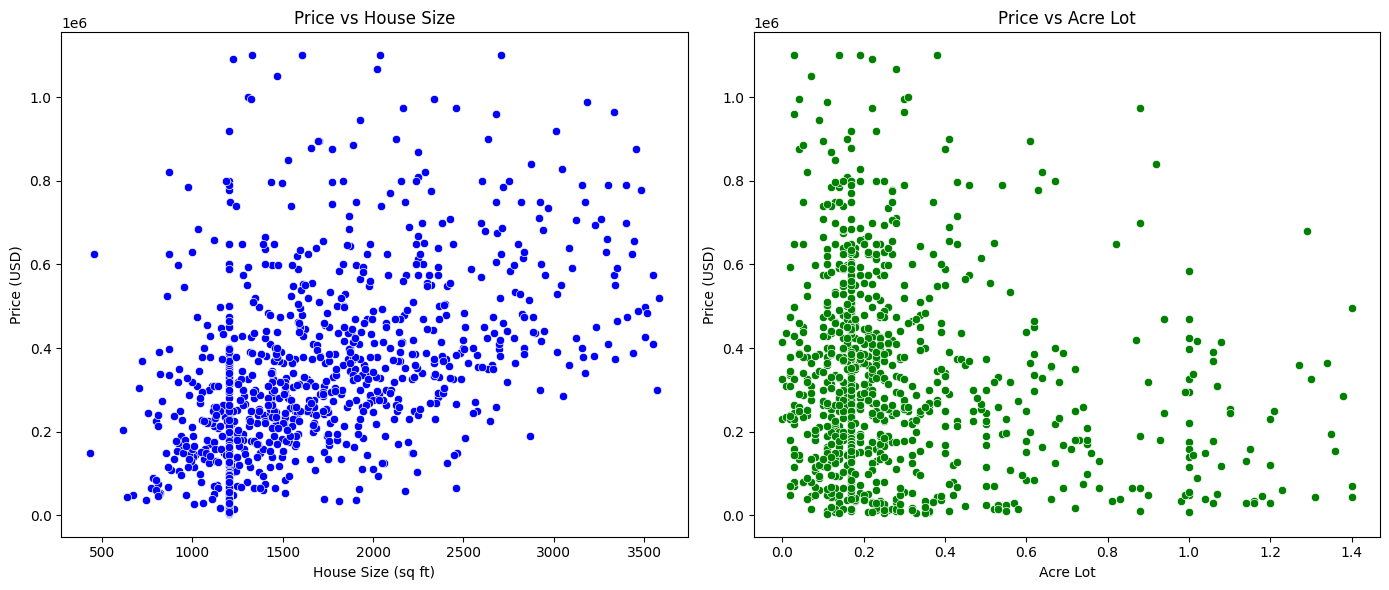

In [32]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_sample, x='house_size', y='price', color='blue')
plt.title('Price vs House Size')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price (USD)')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_sample, x='acre_lot', y='price', color='green')
plt.title('Price vs Acre Lot')
plt.xlabel('Acre Lot')
plt.ylabel('Price (USD)')

plt.tight_layout()
plt.show()


Now let us plot the distribution for all the numerical features.

In [33]:
df_num = df.select_dtypes(include=[np.number]) #just select columns that include numbers

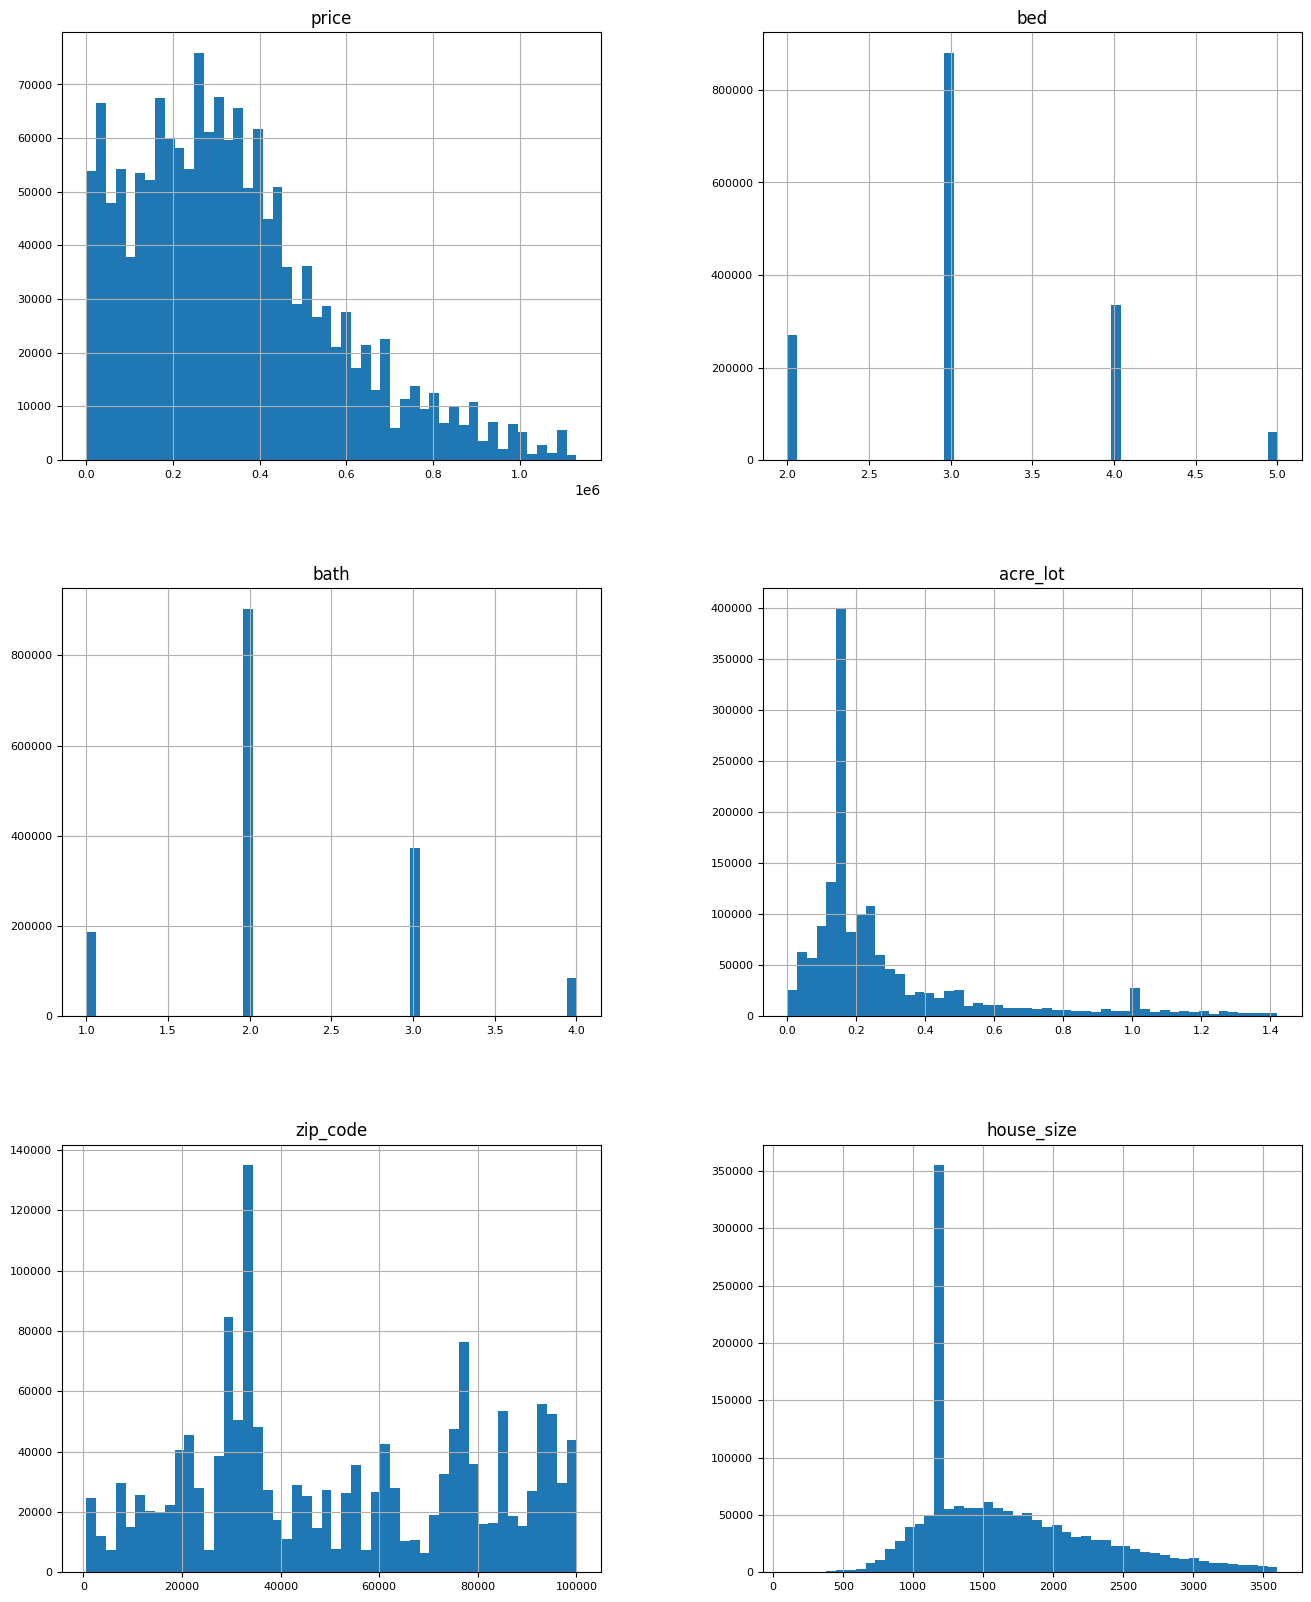

In [34]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [35]:
df.state.unique()

array(['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut',
       'New Jersey', 'New Hampshire', 'Vermont', 'South Carolina',
       'New York', 'Tennessee', 'Rhode Island', 'Virginia', 'Wyoming',
       'Maine', 'Georgia', 'West Virginia', 'Pennsylvania', 'Delaware',
       'Ohio', 'Colorado', 'Maryland', 'Missouri', 'District of Columbia',
       'Wisconsin', 'North Carolina', 'Kentucky', 'Michigan', 'Florida',
       'Mississippi', 'Alabama', 'New Brunswick', 'Arkansas', 'Louisiana',
       'Texas', 'Indiana', 'Illinois', 'Iowa', 'Minnesota',
       'South Dakota', 'Nebraska', 'North Dakota', 'Montana', 'Idaho',
       'Kansas', 'Oklahoma', 'New Mexico', 'Utah', 'Nevada', 'Washington',
       'Oregon', 'Arizona', 'California', 'Hawaii', 'Guam', 'Alaska'],
      dtype=object)

In [36]:
location_abbr = {
    'Puerto Rico': 'PR', 'Virgin Islands': 'VI', 'Massachusetts': 'MA', 'Connecticut': 'CT',
    'New Jersey': 'NJ', 'New Hampshire': 'NH', 'Vermont': 'VT', 'South Carolina': 'SC',
    'New York': 'NY', 'Tennessee': 'TN', 'Rhode Island': 'RI', 'Virginia': 'VA', 'Wyoming': 'WY',
    'Maine': 'ME', 'Georgia': 'GA', 'West Virginia': 'WV', 'Pennsylvania': 'PA', 'Delaware': 'DE',
    'Ohio': 'OH', 'Colorado': 'CO', 'Maryland': 'MD', 'Missouri': 'MO', 'District of Columbia': 'DC',
    'Wisconsin': 'WI', 'North Carolina': 'NC', 'Kentucky': 'KY', 'Michigan': 'MI', 'Florida': 'FL',
    'Mississippi': 'MS', 'Alabama': 'AL', 'New Brunswick': 'NB', 'Arkansas': 'AR', 'Louisiana': 'LA',
    'Texas': 'TX', 'Indiana': 'IN', 'Illinois': 'IL', 'Iowa': 'IA', 'Minnesota': 'MN',
    'South Dakota': 'SD', 'Nebraska': 'NE', 'North Dakota': 'ND', 'Montana': 'MT', 'Idaho': 'ID',
    'Kansas': 'KS', 'Oklahoma': 'OK', 'New Mexico': 'NM', 'Utah': 'UT', 'Nevada': 'NV', 'Washington': 'WA',
    'Oregon': 'OR', 'Arizona': 'AZ', 'California': 'CA', 'Hawaii': 'HI', 'Guam': 'GU', 'Alaska': 'AK'
}
df["State Iso"] = df["state"].map(location_abbr)


This code creates a dictionary, location_abbr, which maps state names to their respective abbreviations. Then, it uses the map() function to create a new column, "State Iso," in the dataframe df, where each state name in the "state" column is replaced with its corresponding abbreviation.

In [37]:
df_grouped = df.groupby('State Iso', as_index=False)['price'].sum()

fig = px.choropleth(df_grouped,
                    locations='State Iso',
                    locationmode='USA-states',
                    color='price',
                    hover_name='State Iso',
                    color_continuous_scale='Plasma',
                    scope="usa"
                   )
fig.update_traces(hovertemplate='<b>%{hovertext}</b><br>Price: %{z:,.0f}')
fig.update_layout(coloraxis_colorbar=dict(title='Price (USD)', tickformat=',.0f'))

fig.show()


In [38]:
top10 = df.groupby('city')['acre_lot'].sum().nlargest(10).reset_index()
fig = px.bar(top10, x='city', y='acre_lot',color='city', template='plotly',
             title='Top 10 Cities with Highest Most Acre Lot')
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')
fig.show()

<Axes: xlabel='price', ylabel='zip_code-state'>

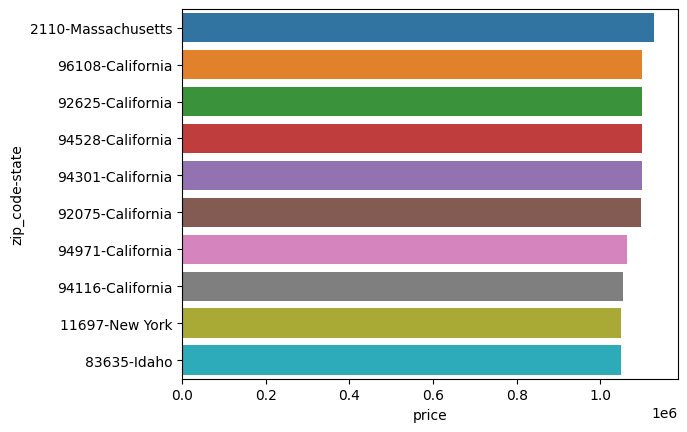

In [39]:
df_data = df.groupby(['zip_code', 'state'], as_index=False)['price'].mean().sort_values('price', ascending=False).head(10)
df_data['zip_code-state'] = df_data['zip_code'].astype(int).astype(str) + '-' +df_data['state'] 
sns.barplot(data = df_data, x = 'price', y = 'zip_code-state')
#Median home prices in top 10 most expensive zip codes



In [40]:
df_sample2=df.sample(n=10000)
df_mean = df_sample2.groupby('price')['house_size'].mean().reset_index()

fig = px.scatter(df_mean, x='price', y='house_size', trendline='ols',
                 labels={'price':'Price', 'house_size':'Mean House Size'})
fig.update_layout(title='Distribution of Mean House Size by Price')
fig.show()

In [41]:
fig = px.scatter(df_sample2, x='house_size', y='price', color='bed', size='bath',trendline='ols')
fig.update_layout(title='House Size vs Price',
                  xaxis_title='House Size',
                  yaxis_title='Price')
fig.show()

# MODEL PREDICTING PRICE HOUSE

In [42]:
df_new = df.sample(n=10000) #our data is too big and process will be slow so I choose 100000 sample in our data

In [43]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 319679 to 517638
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   status      10000 non-null  object 
 1   price       10000 non-null  float64
 2   bed         10000 non-null  float64
 3   bath        10000 non-null  float64
 4   acre_lot    10000 non-null  float64
 5   city        10000 non-null  object 
 6   state       10000 non-null  object 
 7   zip_code    10000 non-null  float64
 8   house_size  10000 non-null  float64
 9   State Iso   10000 non-null  object 
dtypes: float64(6), object(4)
memory usage: 859.4+ KB


# Target Encoding


In [44]:
df_new['city_encoded'] = df_new.groupby('city')['price'].transform('mean')
df_new['state_encoded'] = df_new.groupby('state')['price'].transform('mean')

This code calculates the mean price for each city and state in the df_new dataframe. It creates two new columns: city_encoded, which stores the average price for each city, and state_encoded, which stores the average price for each state. Targer encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model

I need to preprocess my data before training the model. The first step is to scale the columns because there are significant numerical differences between some of the values. I will use the StandardScaler method for this

In [45]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
df_new['house_size'] = StandardScaler().fit_transform(df_new['house_size'].values.reshape(len(df_new), 1)) 
df_new['price'] = StandardScaler().fit_transform(df_new['price'].values.reshape(len(df_new), 1))
df_new['city_encoded'] = StandardScaler().fit_transform(df_new['city_encoded'].values.reshape(len(df_new), 1)) 
df_new['state_encoded'] = StandardScaler().fit_transform(df_new['state_encoded'].values.reshape(len(df_new), 1))

converts the house_size column into a NumPy array. reshape(len(df), 1) reshapes the array into a 2D array with len(df) rows and 1 column. This is necessary because StandardScaler expects a 2D array as input .

In [46]:
df_new['bed'] = MinMaxScaler().fit_transform(df_new['bed'].values.reshape(len(df_new), 1))
df_new['bath'] = MinMaxScaler().fit_transform(df_new['bath'].values.reshape(len(df_new), 1))
df_new['acre_lot'] = MinMaxScaler().fit_transform(df_new['acre_lot'].values.reshape(len(df_new), 1))
#Scales data to a specific range (typically between 0 and 1).

In [47]:
y= df_new["price"] #that is what we want to predict
X =df_new[['bed', 'bath', 'acre_lot', 'zip_code', 'house_size', 'city_encoded', 'state_encoded']]

In [48]:
X

,bed,bath,acre_lot,zip_code,house_size,city_encoded,state_encoded
319679,0.333333,0.666667,0.147887,28584.0,-0.468437,1.070533,-0.680654
1716086,0.333333,0.333333,0.204225,33613.0,0.799700,-0.239779,-0.160989
248820,0.333333,0.666667,0.042254,23120.0,-0.148546,0.212768,0.280840
1941536,0.333333,0.666667,0.183099,76049.0,-0.088159,-0.714320,-0.226278
101255,0.666667,0.333333,0.077465,8251.0,-0.321548,0.868062,0.600401
...,...,...,...,...,...,...,...
529526,0.333333,0.333333,0.880282,34972.0,-0.762214,-1.347920,-0.160989
835802,0.666667,0.333333,0.154930,56601.0,0.313336,-0.653164,-0.097512
1313673,0.000000,0.333333,0.119718,93446.0,-0.683873,0.464736,2.157434
1426073,0.333333,0.333333,0.246479,2828.0,-0.350926,0.989222,0.370688


### Split Train & Test Dataset


We can't use all 100000 entries in our dataset to train our model. The reason is that we want to evaluate our model on data that it hasn't seen yet (out-of-sample data). That way we can get a better idea of its performance in the real world.

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# % of training set
train_pct = 100*len(X_train)/len(X)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/X.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 80.0% of the total data.
Test data makes up the remaining 20.0%.


### Choose Algorithms

In [51]:
from sklearn.model_selection import  StratifiedKFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, VotingClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score, mean_squared_error, mean_absolute_error


In [52]:
random_state = 42
regressors = [
    RandomForestRegressor(random_state=random_state),
    LinearRegression(),
    KNeighborsRegressor()
]


rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}


logreg_param_grid = {}

knn_param_grid = {
    "n_neighbors": np.linspace(1, 19, 10, dtype=int).tolist(),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

regressor_param = [
    rf_params,
    logreg_param_grid,
    knn_param_grid
]


This code sets up three regression models (Random Forest, Linear Regression, KNN) and defines hyperparameters for Random Forest and KNN to optimize during model training. The goal is to find the best performing model by tuning these hyperparameters.

In [53]:
from sklearn.model_selection import RandomizedSearchCV
random_searches = []
for regressor, param_grid in zip(regressors, regressor_param):
    search = RandomizedSearchCV(
        estimator=regressor,
        param_distributions=param_grid,
        n_iter=10,  # Number of parameter settings sampled
        cv=5,  # 5-fold cross-validation
        random_state=random_state,
        n_jobs=-1  # Use all processors
    )
        # Fit the model
    search.fit(X_train, y_train)  # Replace X_train, y_train with your data
    random_searches.append(search.best_params_)
    
    # Print the best parameters
    print(f"Best parameters for {regressor.__class__.__name__}: {search.best_params_}")

Best parameters for RandomForestRegressor: {'n_estimators': 100, 'max_features': 5, 'max_depth': 8}
Best parameters for LinearRegression: {}
Best parameters for KNeighborsRegressor: {'weights': 'distance', 'n_neighbors': 19, 'metric': 'manhattan'}


we will obtained best parameters for each model

In [54]:
regressors = {
              "Linear Regression": LinearRegression(),
             
              "Random Forest Regression": RandomForestRegressor(),
           
              "SVR": SVR(),
              "Decision Tree Regression": DecisionTreeRegressor(),
              "KNN Regression": KNeighborsRegressor(),
            
              }

now let's do cross validation and select a best model for us

In [55]:
def get_scores(test_r2, test_neg_mean_absolute_error, test_neg_mean_squared_error, model_name):
    all_performances['model_name'].append(model_name)
    all_performances['MAE'].append(test_neg_mean_absolute_error)
    all_performances['MSE'].append(test_neg_mean_squared_error)
    all_performances['R2-Score'].append(test_r2)

In [56]:
all_performances = {'model_name':[],'MAE':[], 'MSE':[], 'R2-Score':[]}

In [57]:
from sklearn.model_selection import cross_validate
for name, regressor in regressors.items():

    regressor.fit(X_train, y_train)

    y_test_p = regressor.predict(X_test)

   
    test_r2 = r2_score(y_test, y_test_p)

    print(f"Test R-Squared Score: {test_r2:.5f}\n")

    print(name.upper())
    scores = cross_validate(regressor, X_train, y_train,
                            scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', 'neg_mean_absolute_percentage_error'],
                            cv = 10, return_train_score = False)  
    scores = pd.DataFrame(scores, index = range(1,11))
    list =scores.iloc[:, 2:].mean().abs().apply("{:.5f}".format)
    print(list)
    get_scores(list[0],list[1],list[2],name)

    print("\n############################################################################\n")

Test R-Squared Score: 0.72920

LINEAR REGRESSION
test_r2                                    0.72314
test_neg_mean_absolute_error               0.37661
test_neg_mean_squared_error                0.27390
test_neg_mean_absolute_percentage_error    1.66845
dtype: object

############################################################################

Test R-Squared Score: 0.75516

RANDOM FOREST REGRESSION
test_r2                                    0.75189
test_neg_mean_absolute_error               0.33789
test_neg_mean_squared_error                0.24519
test_neg_mean_absolute_percentage_error    1.63056
dtype: object

############################################################################

Test R-Squared Score: 0.14105

SVR
test_r2                                    0.14398
test_neg_mean_absolute_error               0.70909
test_neg_mean_squared_error                0.84849
test_neg_mean_absolute_percentage_error    2.14060
dtype: object

###############################################

In [58]:
df_performance = pd.DataFrame(all_performances)

In [59]:
df_performance

,model_name,MAE,MSE,R2-Score
0,Linear Regression,0.37661,0.27390,0.72314
1,Random Forest Regression,0.33789,0.24519,0.75189
2,SVR,0.70909,0.84849,0.14398
3,Decision Tree Regression,0.45960,0.46062,0.53403
4,KNN Regression,0.59477,0.63356,0.36030


In [60]:
df_performance['MAE'] = pd.to_numeric(df_performance['MAE'])
df_performance['MSE'] = pd.to_numeric(df_performance['MSE'])
df_performance['R2-Score'] = pd.to_numeric(df_performance['R2-Score'])

Compare the model by visualizing them


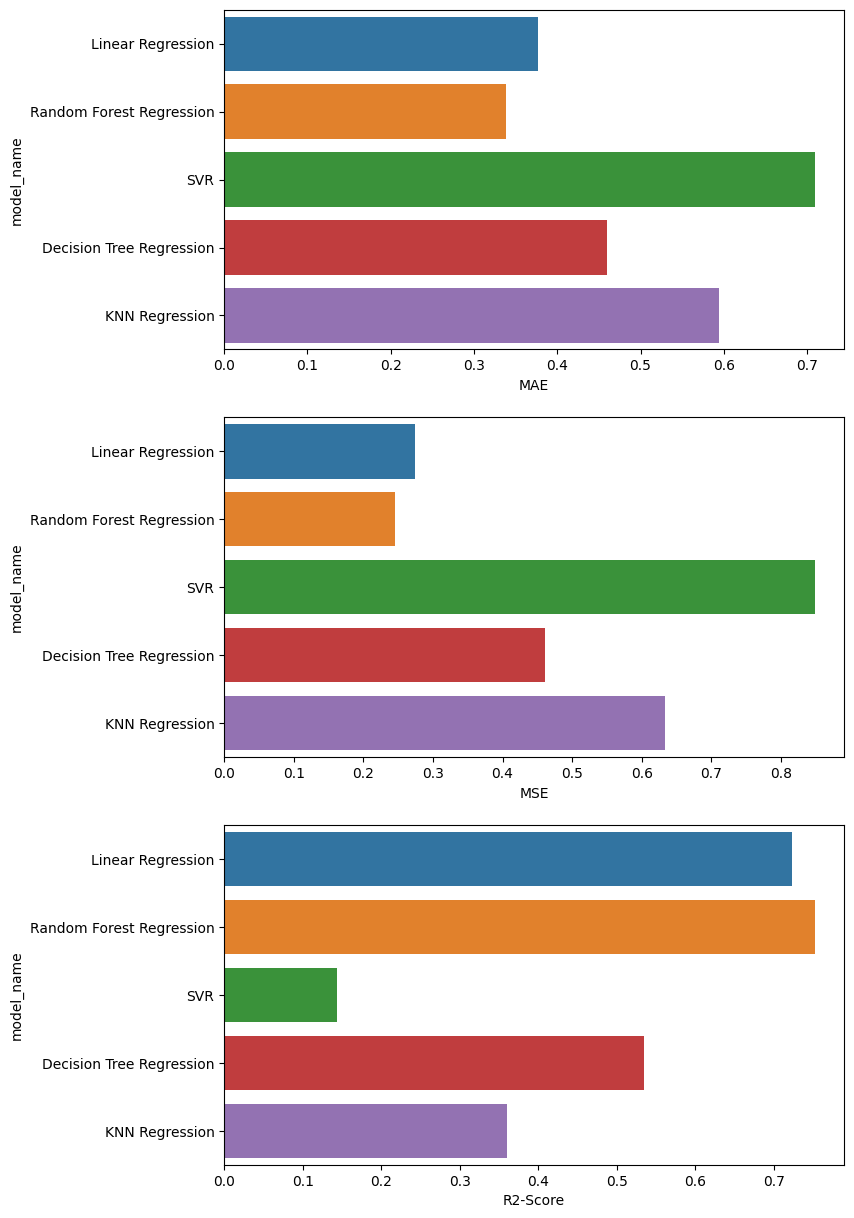

In [61]:
fig, axes = plt.subplots(3, 1, figsize = (8, 15))
sns.barplot(data = df_performance, y = 'model_name', x = 'MAE', ax = axes[0])

sns.barplot(data = df_performance, y = 'model_name', x = 'MSE', ax = axes[1])

sns.barplot(data = df_performance, y = 'model_name', x = 'R2-Score', ax = axes[2])

fig.show()

looks like our best model is RANDOM FOREST REGRESSION and we are gonna continue on them

We already have best paramaters for our model let's use them 

In [62]:
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 5, 
                                 n_estimators =100)

In [63]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=5)

In [64]:
y_pred = rf_tuned.predict(X_test)

In [65]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.5048539133408787

In [66]:
mse_RF = mean_squared_error(y_test, y_pred)
rmse_RF = mean_squared_error(y_test, y_pred, squared=False)
mae_RF = mean_absolute_error(y_test, y_pred)
r2_RF = r2_score(y_test, y_pred)

In [67]:
results = {
    'Random Forest': {'MSE': mse_RF, 'RMSE': rmse_RF, 'MAE': mae_RF, 'R^2': r2_RF},
}


data = pd.DataFrame.from_dict(results, orient='index')
data = data.applymap(lambda x: f'{x:.2f}')

print(data)

                MSE  RMSE   MAE   R^2
Random Forest  0.25  0.50  0.34  0.75


MAE (mean absolute error) & MSE (mean squared error):

MAE and MSE measure the average magnitude of errors between the predicted values and the actual values. MSE penalizes larger errors more heavily due to squaring.

Compared to other models and the base line, random forest regression model has show a significant improvement with much lower MAE and MSE values.
R2-Score

R-squared represents the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features). Higher values of R2 indicate better model fit to the data, with a value of 1 indicating a perfect fit.

We can see a much better R2-score for random forest regression than other  models and the base line.

# Conclusion
This exercise has mainly focused on EDA and feature engineering practices. After cleaned and preprocessed the given dataset, we then build a basic random forest model to estimate the house price. As we can see from the final results, we are able to obtain a pretty decent performance.

# Unsupervised Learning

In [68]:
df_cop = df_new.copy()
df_cop.drop(columns=["city","state","status","State Iso"],axis=1,inplace=True)
df_cop

,price,bed,bath,acre_lot,zip_code,house_size,city_encoded,state_encoded
319679,0.852515,0.333333,0.666667,0.147887,28584.0,-0.468437,1.070533,-0.680654
1716086,-0.262851,0.333333,0.333333,0.204225,33613.0,0.799700,-0.239779,-0.160989
248820,-0.095182,0.333333,0.666667,0.042254,23120.0,-0.148546,0.212768,0.280840
1941536,-0.155646,0.333333,0.666667,0.183099,76049.0,-0.088159,-0.714320,-0.226278
101255,0.165971,0.666667,0.333333,0.077465,8251.0,-0.321548,0.868062,0.600401
...,...,...,...,...,...,...,...,...
529526,-1.313036,0.333333,0.333333,0.880282,34972.0,-0.762214,-1.347920,-0.160989
835802,-0.520144,0.666667,0.333333,0.154930,56601.0,0.313336,-0.653164,-0.097512
1313673,-0.605480,0.000000,0.333333,0.119718,93446.0,-0.683873,0.464736,2.157434
1426073,0.251735,0.333333,0.333333,0.246479,2828.0,-0.350926,0.989222,0.370688


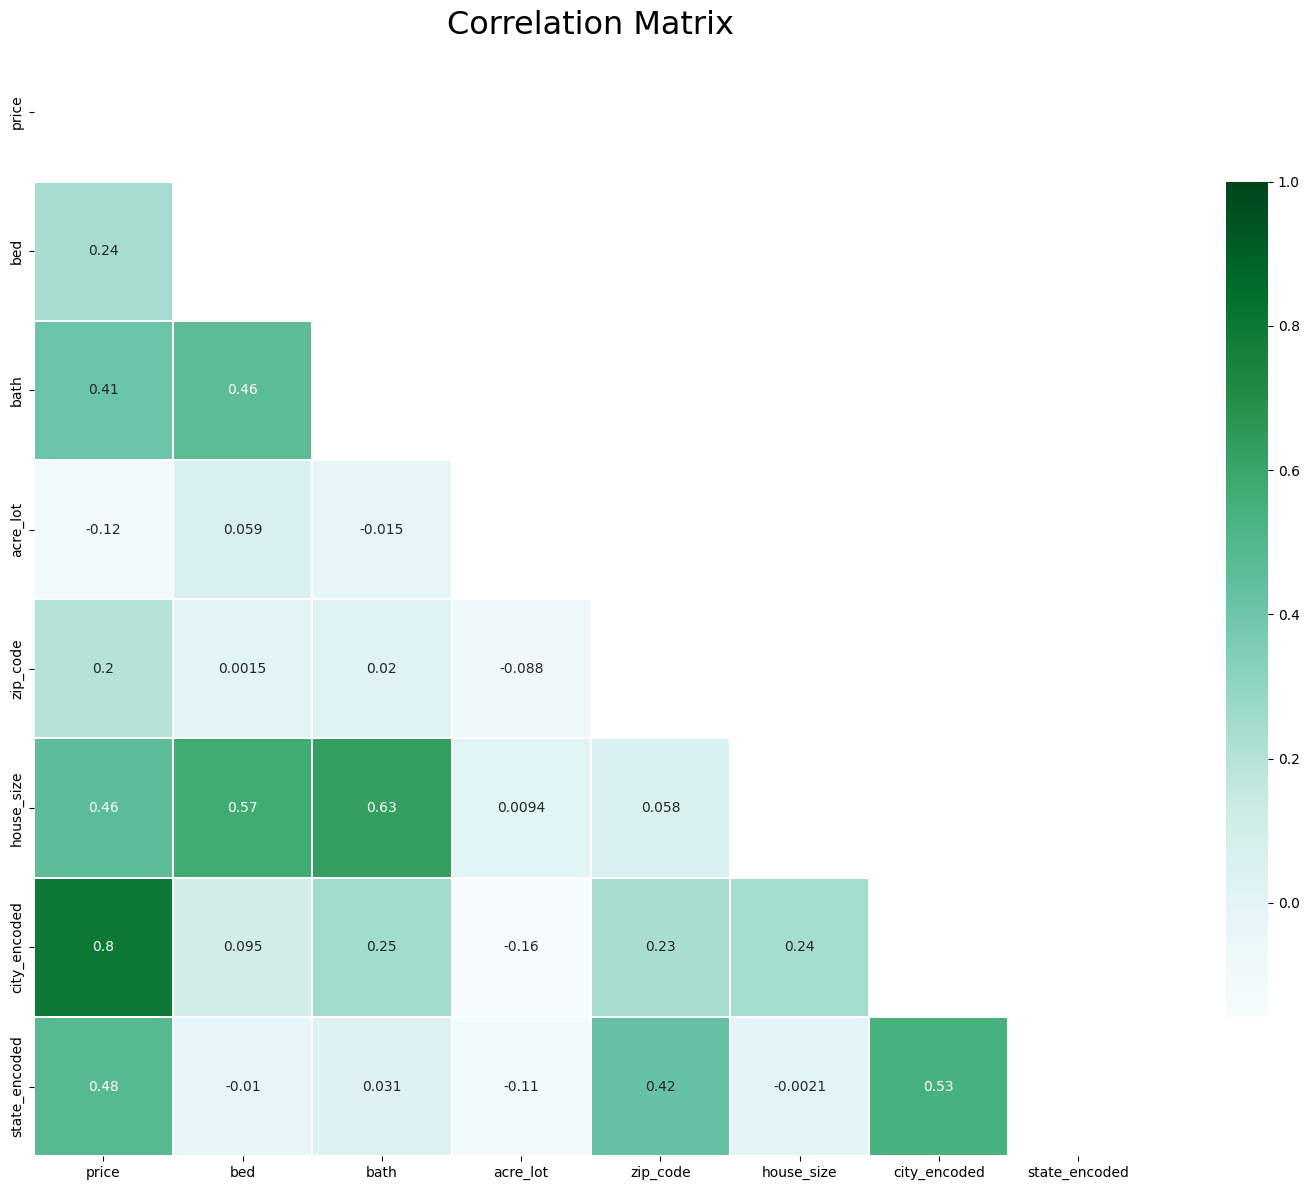

In [69]:
mask = np.zeros_like(df_cop.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Correlation Matrix',fontsize=23)

sns.heatmap(df_cop.corr(),linewidths=0.25, vmax=1.0, square=True, cmap="BuGn",
            linecolor='w', annot=True, mask=mask, cbar_kws={"shrink": .75})
f.tight_layout()

there is a strong correlation between price and city_encoded also bath and house_size

Text(0.5, 0.98, 'Positive and Negative Correlation Visualizations')

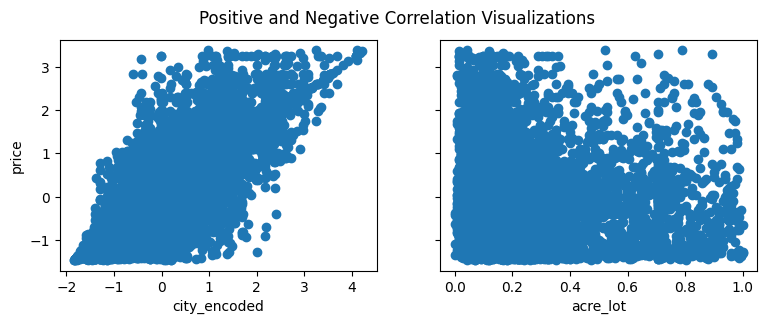

In [70]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
axs[0].scatter(df_cop["city_encoded"].values, df_cop["price"].values)
axs[0].set_xlabel('city_encoded')
axs[0].set_ylabel('price')
axs[1].scatter(df_cop["acre_lot"].values, df_cop["price"].values)
axs[1].set_xlabel('acre_lot')
fig.suptitle('Positive and Negative Correlation Visualizations')

acre_lot and price is not a strong negative correlation just normal

In [71]:

# Drop the target column as we don't require for Unsupervized machine learning

df_dropped = df_cop.drop('price', axis=1)

X = df_dropped.values[:, 0:]
X

array([[ 0.33333333,  0.66666667,  0.14788732, ..., -0.46843689,
         1.0705335 , -0.68065413],
       [ 0.33333333,  0.33333333,  0.20422535, ...,  0.79970005,
        -0.23977888, -0.16098897],
       [ 0.33333333,  0.66666667,  0.04225352, ..., -0.14854649,
         0.21276847,  0.28083961],
       ...,
       [ 0.        ,  0.33333333,  0.11971831, ..., -0.68387328,
         0.46473554,  2.15743381],
       [ 0.33333333,  0.33333333,  0.24647887, ..., -0.35092613,
         0.98922195,  0.3706882 ],
       [ 0.66666667,  0.66666667,  0.35211268, ...,  2.46769998,
         1.20134637, -0.16098897]])

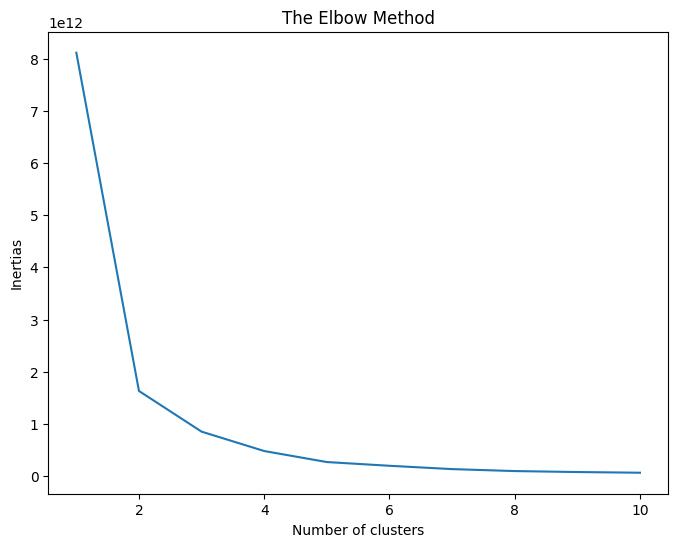

In [72]:
# Using the Elbow method to find the optimal number of clusters
# calculate inertias values for 1-10 clusters
from sklearn.cluster import KMeans
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),inertias)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.show()

In [73]:
# Training the k-means model on the dataset
# From the above plot, you can see the optimal value of k is between 2 and 4. The elbow-like shape is formed at k = 3 in the above diagram

kmeans3 = KMeans(n_clusters=3, init='k-means++', random_state=42)

training_points = X[:5000]
test_points = X[5000:]
kmeans3.fit(training_points)
labels = kmeans3.predict(test_points)


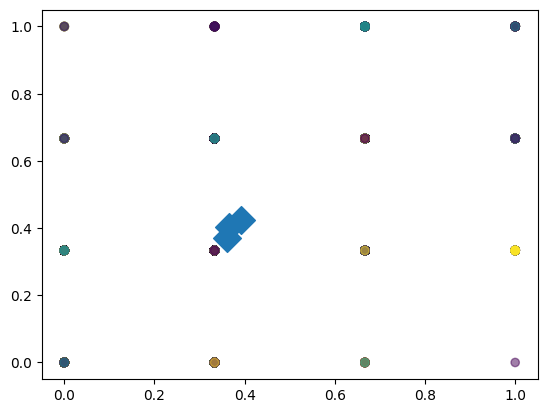

In [74]:
xs = test_points[:,0]
ys = test_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = kmeans3.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D',s=200)
plt.show()

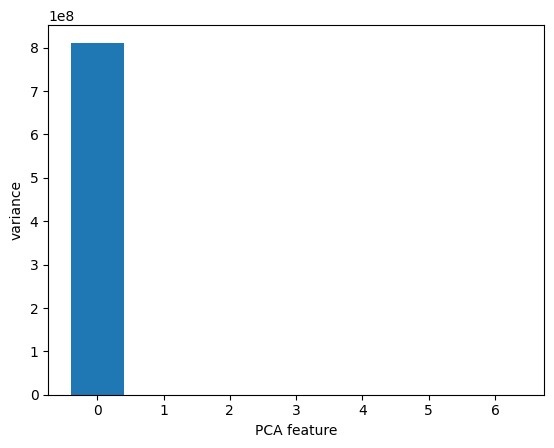

In [75]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [76]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[9.99999996e-01 1.73371317e-09]
0.9999999981376587


In [77]:
pca = PCA(n_components=2)
pca.fit(X)
pca_features = pca.transform(X)

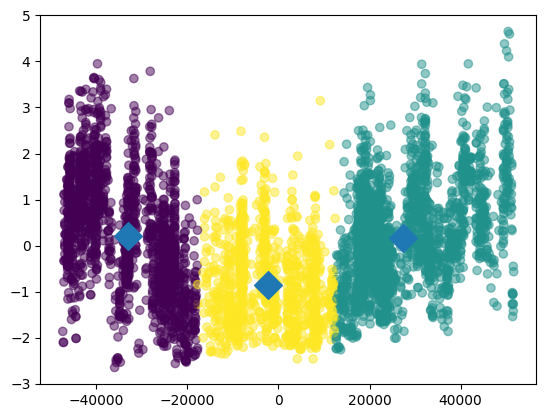

In [78]:
model = KMeans(n_clusters=3)
training_points = pca_features[:5000]
test_points = pca_features[5000:]
model.fit(training_points)
labels = model.predict(test_points)
xs = test_points[:,0]
ys = test_points[:,1]

plt.scatter(xs, ys, c=labels, alpha=0.5)

centroids = model.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.scatter(centroids_x, centroids_y, marker='D',s=200)
plt.show()

In [79]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(test_points, labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.6128921528244026
